# Lesson 29 - Diagnosing Breast Cancer

### The following topics are discussed in this notebook:
* A complete example of using classificaiton models to diagnose potentially cancerous tumors. 

## Wisconsion Breast Cancer Dataset

In this example, we will be working with the Wisconsin Breast Cancer Dataset. Each of the 569 observations in this dataset contains 30 measurements taken from images of cell nuclei drawn from a potentially cancerous breast mass. Each observation is labeled as being benign (B) or malignant (M).

Our goal will be to build a model for the purposes of predicting the diagnosis of the tumor using the 30 measurements as features. 

## Import Packages and Tools

We will begin by importing the packages and tools that we will use in this example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load the Data

The data is stored in the coma-delimited file `breast_cancer.csv`. We will load that now.

In [2]:
wbc = pd.read_csv('data/breast_cancer.csv', sep=',')
print(wbc.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## Prepare the Data

We will extract the feature and label arrays, and split the dataset into training, validation and testing sets using a 60/20/20 split.

In [3]:
X = wbc.iloc[:,2:].values
y = wbc.iloc[:,1].values

X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(341,)
(114,)
(114,)


## Create Logistic Regression Model

In the cell below, we create a logistic regression model, and then calculate its training and validation accuracy. 

In [4]:
logreg_mod = model_2 = LogisticRegression(solver='lbfgs', penalty='none', max_iter=5000)
logreg_mod.fit(X_train, y_train)

print('Training Accuracy:  ', round(logreg_mod.score(X_train, y_train),4))
print('Validation Accuracy:', round(logreg_mod.score(X_test, y_test),4))

Training Accuracy:   1.0
Validation Accuracy: 0.9649


## Create Decision Tree Model

We will now perform hyperparameter tuning to select the optimal value for the `max_depth` parameter for a decision tree. 

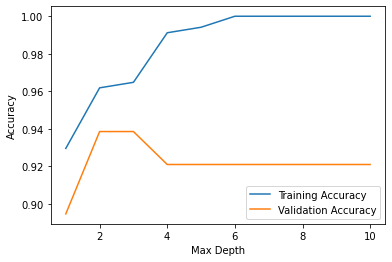

In [5]:
tr_acc = []
va_acc = []

depth_list = range(1,11)

for d in depth_list:
    temp_mod = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_valid, y_valid))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It appears that we get the best performance on the validation set when `max_depth=2`. We confirm this below.

In [6]:
ix_best = np.argmax(va_acc)
best_md = depth_list[ix_best]
print('Optimal Value of max_depth:', best_md)

Optimal Value of max_depth: 2


We will now create and score our decision tree model. 

In [7]:
tree_mod = DecisionTreeClassifier(max_depth=best_md, random_state=1)
tree_mod.fit(X_train, y_train)

print('Training Accuracy:  ', round(tree_mod.score(X_train, y_train),4))
print('Validation Accuracy:', round(tree_mod.score(X_valid, y_valid),4))

Training Accuracy:   0.9619
Validation Accuracy: 0.9386


## Create Random Forest Model

We will now create a random forest model consisting of 500 trees, each with a `max_depth` of 32. 

In [8]:
forest_mod = RandomForestClassifier(n_estimators=500, max_depth=32, random_state=1)
forest_mod.fit(X_train, y_train)

print('Training Accuracy:  ', round(forest_mod.score(X_train, y_train),4))
print('Validation Accuracy:', round(forest_mod.score(X_valid, y_valid),4))

Training Accuracy:   1.0
Validation Accuracy: 0.9386


## Scoring Final Model

The logistic regression model had the highest validation accuracy of any of our models, so we will select it to be our final model. We will now calculate this model's accuracy on the test set. 

In [9]:
print('Test Set Accuracy:', round(logreg_mod.score(X_test, y_test),4))

Test Set Accuracy: 0.9649
